In [10]:
#Imports
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from tslearn.utils import *
from tslearn.clustering import TimeSeriesKMeans
from contextlib import redirect_stdout

In [53]:
seed = 1
np.random.seed(seed)
companyStockFile = sys.argv[1]
#Get Companies
companiesCSV = pd.read_csv('./DataFrames/Stock data.csv',index_col = 0)
#companiesCSV = pd.read_csv(companyStockFile,index_col = 0)

In [49]:
#Split companies into their own data structures
#Format each company to a time series for use with tslearn
companyNames = []
companyStockPrices = []
formatted_time_series = []
numCompanies = len(companiesCSV.columns)-3
display(numCompanies)

for company in range(0,numCompanies):
    companyNames.append(companiesCSV.columns.values[company+3])
#    display(companiesCSV.filter(companyNames[company]))
    companyStockPrices.append(companiesCSV.filter(items=[companyNames[company]]))
    initialStockPrice = companyStockPrices[company].iloc[0,0]
    for stockPrice in range(0,len(companyStockPrices[company])):
        companyStockPrices[company].iloc[stockPrice,0] -= initialStockPrice
    companyStockPrices[company] = companyStockPrices[company].T
    companyStockPrices[company] = companyStockPrices[company].to_numpy()
    formatted_time_series.append(to_time_series(companyStockPrices[company]))

9

In [45]:
numClusters = 4
seed = 5
np.random.seed(seed)
formatted_dataset = to_time_series_dataset(formatted_time_series)
sz = formatted_dataset.shape[1]
km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",
                                  random_state=seed,n_init=3)   
clusterPredictions = km.fit_predict(formatted_dataset)

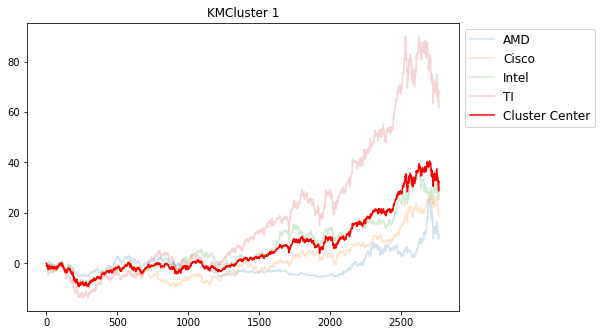

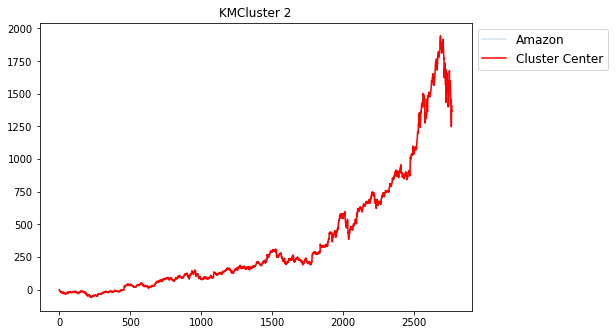

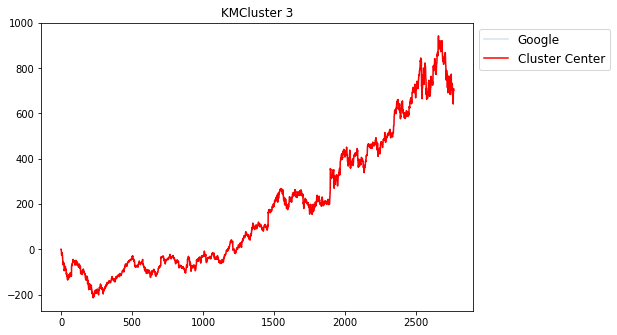

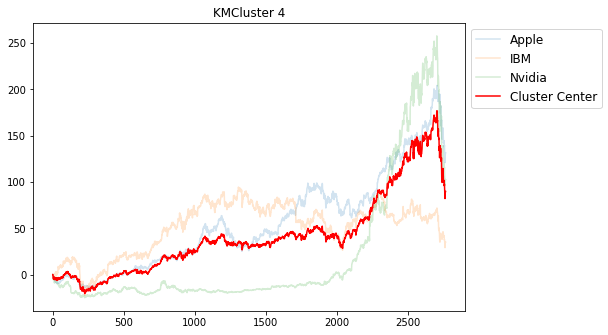

In [52]:
for cluster in range(numClusters):
    figName = "Cluster" + str(cluster) + '.jpg'
    fig = plt.figure()#figsize=(20,10))
    #plt.tight_layout()
    ax = fig.add_axes([0,0,1,1])
    for j in range(0,len(formatted_dataset)):
        if(clusterPredictions[j] == cluster):
            xx = formatted_dataset[j]
            ax.plot(xx.ravel(), alpha=.2, label=companyNames[j]) #"k-"
    ax.plot(km.cluster_centers_[cluster].ravel(), "r-", label='Cluster Center') 
    ax.set_title("KMCluster " + str(cluster+1))
    lgd = ax.legend(bbox_to_anchor=(1, 1),fontsize = 'large')
    fig.savefig(figName,bbox_inches="tight")

[103851844.529, 14119777.097, 2446102.293, 1239260.566, 457986.167, 168889.705, 21290.607, 6014.061, 0.0]


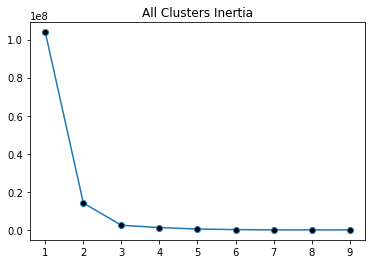

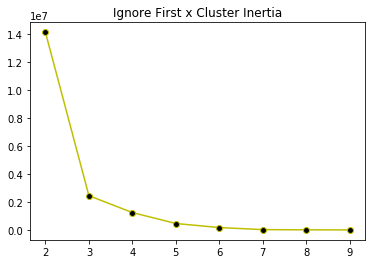

In [56]:
allInertias = []
companyAxis = []
for i in range(1,numCompanies+1):
    numClusters = i
    km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",verbose=True,
                              random_state=seed,n_init=3)

    capturedOutput = io.StringIO()
    with redirect_stdout(capturedOutput):
        clusterPredictions = km.fit_predict(formatted_dataset)
    inertiaOutput = capturedOutput.getvalue()
    inertiaOutputSplit = str.split(inertiaOutput,' --> ')
    inertia = inertiaOutputSplit[-2]
    allInertias.append(float(inertia))
    companyAxis.append(i)

print(allInertias)
plt.figure()
plt.title("All Clusters Inertia")
plt.plot(companyAxis,allInertias, marker='o', markerfacecolor='black')
plt.figure()
plt.title("Ignore First x Cluster Inertia")
x = 1
plt.plot(companyAxis[x:],allInertias[x:], 'y', marker = 'o', markerfacecolor='black')


[0.8640392266402439, 0.11240700496889294, 0.01162080204230746, 0.007522970848936958, 0.0027837393096977843, 0.0014212467642669923, 0.00014709941907419967, 5.791000657981197e-05]
[0.7516322216713509, 0.10078620292658548, 0.004097831193370501, 0.004739231539239174, 0.001362492545430792, 0.0012741473451927925, 8.91894124943877e-05]
[False, True, True, False, True, False, True, True]
[0.6954287191869044, 0.09691260224581633, 0, 0.004182483677299617, 0, 0.0012531331424679069, 8.19506616719112e-05]
0.6954287191869044


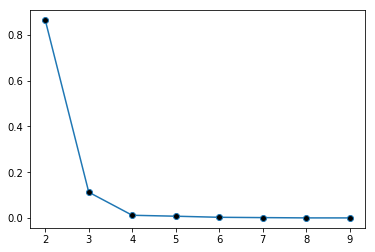

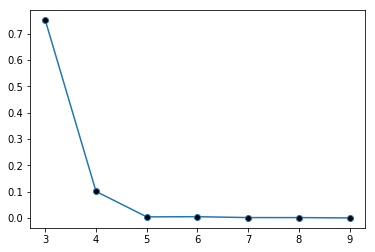

In [92]:
delta1 = []
delta2 = []
elbows = []
strengths = []
allInertiasNormalized = []
for i in range(len(allInertias)):
    allInertiasNormalized.append(allInertias[i]/allInertias[0])
for i in range(len(allInertiasNormalized)-1):
    delta1.append(allInertiasNormalized[i]-allInertiasNormalized[i+1])
print(delta1)
for i in range(len(delta1)-1):
    delta2.append(delta1[i]-delta1[i+1])
print(delta2)
elbows.append(False)
for i in range(len(allInertiasNormalized)-2):
    if(delta2[i]>delta1[i+1]):
        elbows.append(True)
        strengths.append((delta2[i]-delta1[i+1]/(i+2)))
    else:
        elbows.append(False)
        strengths.append(0)
print(elbows)
print(strengths)
print(max(strengths))
plt.figure()
y = 0
plt.plot(companyAxis[y+1:],delta1[y:], marker='o', markerfacecolor='black')
plt.figure()
plt.plot(companyAxis[y+2:],delta2[y:], marker='o', markerfacecolor='black')



In [ ]:
#This is all for figuring out dynamic KMeans. Ignore this rn
def getInertia(capturedOutput):
    inertiaOutput = capturedOutput.getvalue()
    allInertias = str.split(inertiaOutput,' --> ')
    finalInertia = allInertias[-2]
    return finalInertia

def runKMeans(formatted_dataset, seed, numCompanies):
    numClusters = runKMeansPlusPLus(formatted_dataset, seed, numCompanies)
    km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",
                                  random_state=seed,n_init=3)   
    return km.fit_predict(formatted_dataset), km

def runKMeansPlusPLus(formatted_dataset, seed, numCompanies):
    
    inDistances = getLineDistances(allInertias)
    print(inDistances)
    

    plt.scatter(companyAxis,inDistances)
    plt.show()
    #return min{inDistancesIndex}

    return 4
   


def getLineDistances(allInertias):
    """
    firstInertia = allInertias[0]
    firstInertiaSquared = firstInertia**2
    numCompanies = len(allInertias)
    denominator = math.sqrt(firstInertiaSquared+(len(allInertias)-1)**2)
    distances = []
    for i in range(numCompanies):
        numerator = firstInertia*(numCompanies-i) - ((numCompanies-1)*allInertias[i])
        distances.append(numerator/denominator)
    return distances
    """
    
    numCompanies = len(allInertias)
    slope = (-1)*allInertias[0]/(numCompanies-1)
    slopeSquared = slope**2
    #denominator = math.sqrt(slopeSquared+1)
    #print("denominator: " + str(denominator))
    distances = []
    a = slope
    b = -1
    c = allInertias[0] - slope
    denominator = math.sqrt(a*a + b*b)
    for i in range(numCompanies):
        x = i
        y = allInertias[i]
        numerator = math.fabs(a*x + b*y + c)
        print("numerator" + str(i) + ": " + str(numerator))
        distances.append(numerator/denominator)
    x = np.linspace(0,10,100)
    y = slope*x+allInertias[0] - slope
    plt.plot(x,y,'-r')
    return distances